# Chapter 2 Regular Expression with Python

# 1. Backlash in string literals

Regular expressions aren't part of the core Python language. Thus, there isn't a special syntax for them and therefore they are handled as any other string. As we've seen in *Chapter 1, Introducing Regular Expressions*, the backslash character ```\``` is used to indicate metacharacters or special forms in regular expressions. The backslash is also used in strings to escape special characters. In other words, it has a special meaning in Python. So, if we need to use the ```\``` character, we'll have to escape it: ```\\```. This will give the string literal meaning to the backslash. However, in order to match inside a regular expression, we should escape the backslashes, effectively writing four back slashes: ```'\\\\'```. 

In [1]:
import re

Just as an example, let's write a regular expression to match ```\```:

In [2]:
pattern = re.compile("\\\\")
re.search(pattern, "\\author")

<re.Match object; span=(0, 1), match='\\'>

As you can see, this is tedious and diffcult to understand when the pattern is long.

Python provides **the raw string notation r**, with which the backslashes are treated as normal characters. So, ```r"\b"``` is not the backspace anymore; it's just the character ```\``` and the character ```b```, and the same goes for ```r"\n"```.

In [3]:
pattern = re.compile(r"\\")
re.search(pattern, "\\author")

<re.Match object; span=(0, 1), match='\\'>

# 2. Building block for Python Regex

In Python, there are two different objects dealing with Regex:
- **RegexObject**: It is also known as **Pattern Object**. It represents a compiled regular expression
- **MatchObject**: It represents the **matched pattern**

## 2.a Regex Object

In order to start matching patterns, we'll have to compile the regex. Python gives us 
an interface to do that as we've seen previously. The result will be a pattern object 
or RegexObject. This object has several methods for typical operations on regular 
expressions. As we will see later, the re module provides a shorthand for every 
operation so that we can avoid compiling it frst.

```pattern = re.compile(r'fo+')```

The compilation of a regular expression produces a reusable pattern object that provides all the operations that can be done, such as matching a pattern and fnding all substrings that match a particular regex. So, for example, if we want to know if a string starts with ```<HTML>```, we can use the following code:

In [4]:
pattern = re.compile(r'<HTML>')

pattern.match("<HTML>code is fun")

<re.Match object; span=(0, 6), match='<HTML>'>

There are two ways of matching patterns and executing the operations related to the regular expressions. We can compile a pattern, which gives us a ```RegexObject```, or we can use the module operations. Let's compare the two different mechanisms in the following examples.

If we want to re-use the regular expression, we can use the following code:

In [5]:
pattern = re.compile(r'<HTML>')
pattern.match("<HTML>code is fun")

<re.Match object; span=(0, 6), match='<HTML>'>

On the other hand, we can directly perform the operation on the module using the following line of code:

In [6]:
re.match(r'<HTML>','<HTML>code is fun')

<re.Match object; span=(0, 6), match='<HTML>'>

The re module provides a wrapper for every operation in the ```RegexObject```. You can see them as shortcuts.

Internally, these wrappers create the RegexObject and then call the corresponding method. You might be wondering whether every time you call one of these wrappers it compiles the regular expression first. The answer is no. The re module caches the compiled pattern so that in future calls it doesn't have to compile it again.

Beware of the memory needs of your program. When you're using module operations, you don't control the cache, and so you can end up with a lot of memory usage. You can always use ```re.purge``` to clear the cache but this is a tradeoff with performance. Using compiled patterns allows you to have a fne-grained control of the memory consumption because you can decide when to purge them.

There are some differences between both ways though. With the ```RegexObject```, it is possible to limit the region in which the pattern will be searched, for example limit the search of a pattern between the characters at index 2 and 20. In addition to that, you can set flags in every call by using the operations in the module. However, be careful; every time you change the fag, a new pattern will be compiled and cached.

Let's dive into the most important operations that can be done with a pattern object.

### Searching

Lets see opperations we have to look for pattern in strings. Note that python has two operations, **match** and **search**, where many other languages have one, match.

#### match(string[, pos[, endpos]])

This method tries to match the compiled pattern **only at the beginning of the string**. If there is a match, then it returns a MatchObject. So, for example, let's try to match whether a string starts with <HTML> or not:

In [7]:
pattern = re.compile(r'<HTML>')
pattern.match("<HTML><head>")

<re.Match object; span=(0, 6), match='<HTML>'>

In the preceding example, frst we've compiled the pattern and then we've found a match in the ```<HTML><head>``` string.

Let's see what happens when the string doesn't start with ```<HTML>```, as shown in the following lines of code:

In [8]:
pattern.match(" <HTML> ")

As you can see, there is no match. Remember what we said before, match tries to 
match at the beginning of the string. The string starts with a whitespace unlike the pattern. Note the difference with search in the following example:

In [9]:
pattern.search(" <HTML> ")

<re.Match object; span=(1, 7), match='<HTML>'>

As expected, we have a match.

The optional **pos** parameter specifes where to start searching, as shown in the following code:

In [10]:
pattern.match("  <HTML>",2)

<re.Match object; span=(2, 8), match='<HTML>'>

In the highlighted code, we can see how the pattern has a match even though there are two whitespaces in the string. This is possible because we've set pos to 2, so the match operation starts searching in that position.

Note that pos bigger than 0 doesn't mean that string starts at that index, for example:

In [11]:
pattern = re.compile(r'^<HTML>')
pattern.match("<HTML>")

<re.Match object; span=(0, 6), match='<HTML>'>

In [12]:
pattern.match("  <HTML>",2)

In the preceding code, we've created a pattern to match strings in which the frst character after "start" is followed by ```<HTML>```. After that, we've tried to match the string ```<HTML>``` starting at the second character, ```<```. There is no match because the pattern is trying to match the ```^``` metacharacter at the 2 position first.

Note the different result if we slice the string 2 positions, as in the following code:

In [13]:
pattern.match("  <HTML>"[2:])

<re.Match object; span=(0, 6), match='<HTML>'>

The slice gives us a new string; therefore, there is a ^ metacharacter in it. On the contrary, pos just moves the index to the starting point for the search in the string.
The second argument, **endpos**, sets how far the pattern will try to match in the string. In the following case, it's equivalent to slicing:

In [14]:
pattern = re.compile(r'<HTML>')

In [15]:
pattern.match("<HTML>"[:2])

In [16]:
pattern.match("<HTML>", 0,2)

So, in the following case, we don't have the problem mentioned with **pos**. There is a match even when the $ metacharacter is used:

In [17]:
pattern = re.compile(r'<HTML>$')

In [18]:
pattern.match("<HTML> ", 0,6)

<re.Match object; span=(0, 6), match='<HTML>'>

In [19]:
pattern.match("<HTML> "[:6])

<re.Match object; span=(0, 6), match='<HTML>'>

As you can see, there is no difference between slicing and endpos.

#### search(string[, pos[, endpos]])

This operation would be like the **match** of many languages, Perl for example. 
It tries to match the pattern at any location of the string and not just at the beginning. 

If there is a match, it returns a ```MatchObject```.

In [20]:
pattern = re.compile(r"world")

In [21]:
pattern.search("hello world")

<re.Match object; span=(6, 11), match='world'>

In [22]:
pattern.search("hola mundo")

The pos and endpos parameters have the same meaning as that in the match 
operation.

Note that with the ```MULTILINE``` flag, the ```^``` symbol matches at the beginning of the string and at the beginning of each line (we'll see more on this fag later). So, it changes the behavior of ```search```.
In the following example, the frst search matches ```<HTML>``` because it's at the beginning of the string, but the second ```search``` doesn't match because the string starts with a whitespace. And fnally, in the third search, we have a match as we fnd ```<HTML>``` right after new line, thanks to ```re.MULTILINE```.

In [23]:
pattern = re.compile(r'^<HTML>', re.MULTILINE)

In [24]:
pattern.search("<HTML>")

<re.Match object; span=(0, 6), match='<HTML>'>

In [25]:
pattern.search(" <HTML>")

In [26]:
pattern.search("  \n<HTML>")

<re.Match object; span=(3, 9), match='<HTML>'>

So, as long as the **pos** parameter is less than, or equal to, the new lines, there will  be a match.

In [27]:
pattern.search("  \n<HTML>", 3)

<re.Match object; span=(3, 9), match='<HTML>'>

In [28]:
pattern.search("</div></div>\n<HTML>", 4)

<re.Match object; span=(13, 19), match='<HTML>'>

In [29]:
pattern.search("  \n<HTML>", 4)

#### findal(string[,pos[,endpos]])

The previous operations worked with one match at a time. On the contrary, in this case it returns a list with all the non-overlapping occurrences of a pattern and not the ```MatchObject``` like search and match do.

In the following example, **we're looking for every word in a string**. So, we obtain a list in which every item is the pattern found, in this case a word.

In [30]:
pattern = re.compile(r"\w+")

In [31]:
pattern.findall("hello world")

['hello', 'world']

Keep in mind that empty matches are a part of the result:

In [32]:
pattern = re.compile(r'a*')
pattern.findall('aba')

['a', '', 'a', '']

I bet you're wondering what's happening here? The trick comes from the * quantifer, which allows 0 or more repetitions of the preceding regex; the same had happened with the ? quantifer.

In [33]:
pattern = re.compile(r'a?')
pattern.findall('aba')

['a', '', 'a', '']

Basically, both of them match the expression even though the preceding regex  
is not found:

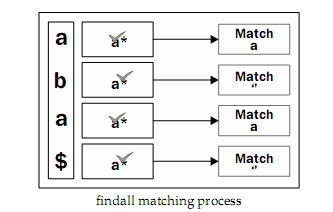

First, the regex matches the character a, then it follows with b. There is a match due to the * quantifer, the empty string. After that, it matches another a and fnally it tries to match ```$```. As we've mentioned before, even though you can't see ```$```, it's a valid character for the regex engine. As it happened with the b, it matches due to the * quantifer.

We've seen quantifers in depth in Chapter 1, Introducing Regular Expressions.

In case there are groups in the pattern, they are returned as tuples. The string is scanned from left to right, so the groups are returned in the same order they are found.

The following example tries to match a pattern made of two words and creates a 
group for every word. That's why we have a list of tuples in which every tuple has two groups.

In [34]:
pattern = re.compile(r"(\w+) (\w+)")
pattern.findall("Hello world hola mundo")

[('Hello', 'world'), ('hola', 'mundo')]

The findall operation along with groups is another thing that seems to confuse a lot of people. In Chapter 3, Groups, we've dedicated a complete section to explain this complex subject. 

#### finditer(string[,pos[,endpos]])

Its working is essentially the same as ```findall```, but it returns an iterator in which each element is a ```MatchObject```, so we can use the operations provided by this object. So, it's quite useful when you need information for every match, for example the position in which the substring was matched. Several times, I've found myself using it to understand what's happening in ``findall``.

Let's go back to one of our initial examples. Match every two words and capture them:

In [35]:
pattern = re.compile(r"(\w+) (\w+)")

In [36]:
it = pattern.finditer("Hello world hola mundo")

In [37]:
it

In [38]:
for item in it:
    print(item)

<re.Match object; span=(0, 11), match='Hello world'>
<re.Match object; span=(12, 22), match='hola mundo'>


In [39]:
match = it.next()

AttributeError: 'callable_iterator' object has no attribute 'next'

### Modifying a string

#### split(string, maxsplit=0)

#### sub(repl, string, count=0)

#### subn(repl, string, count=0)

## 2.b Match Object

This object represents the **matched pattern**; you will get one every time you execute one of these operations:
- match
- search
- finditer

This object provides us with a set of operations for working with the captured 
groups, getting information about the position of the match, and so on. Let's see  the most important operations.

### group([group1, ...)

**The group operation gives you the subgroups of the match**. If it's invoked with no arguments or zero, it will return the entire match; while if one or more group identifers are passed, the corresponding groups' matches will be returned.

Let's see them with an example:

In [ ]:
pattern = re.compile(r"(\w+) (\w+)")
match = pattern.search("Hello world")

The pattern matches the whole string and captures two groups, ```Hello``` and ```world```. 
Once we have the match, we can see the the following concrete cases:

1. with no arguments or zero, it returns the entire match.

In [ ]:
match.group()

In [ ]:
match.group(0)

2. with ```group1``` bigger than 0, it returns the corresponding group

In [ ]:
match.group(1)

In [ ]:
match.group(2)

In [ ]:
# this is my own experiment
pattern2 = re.compile(r"(\w+) (\w+)")
match2 = pattern2.search("Hello world hola man")
match2

3. if the group doesn't exist, an ```Indexerror``` will be thrown.

In [ ]:
match.group(3)

4. with multiple arguments, it returns the corresponding groups

In [ ]:
match.group(0,2)

in this case, we want the whole pattern and the second group, that's why we pass 0 and 2.

**Groups can be named**, we'll see it in depth in the next chapter; there is a special notation for it. If the pattern has named groups, they can be accessed using the names or the index:

In [ ]:
pattern = re.compile(r"(?P<first>\w+) (?P<second>\w+)")

In the preceding example, we've compiled a pattern to capture two groups: the frst one is named ```first``` and the second one is named ```second```.

In [ ]:
match = pattern.search("Hello world")
match.group('first')

In [ ]:
match.group('second')

In this way, we can get a group by its name. Note that using named groups we can still get the groups by their index, as shown in the following code:

In [ ]:
match.group(1)

In [ ]:
match.group(2)

we can even use both types:

In [ ]:
match.group(0, 'first', 2)

### groups(default)

The ```groups``` operation is similar to the previous operation. However, in this case it returns a tuple with all the subgroups in the match instead of giving you one or some of the groups. Let's see it with the example we've used in the previous section:

In [42]:
patterns = re.compile("(\w+) (\w+)")
matches = patterns.search("Hello world")

In [43]:
matches.groups()

('Hello', 'world')

In [44]:
# how group() differ from groups()

matches.group()

'Hello world'

In [45]:
matches.group(1)

'Hello'

In [46]:
matches.group(2)

'world'

As we had in the previous section, we have two groups ```Hello``` and ```World``` and that's exactly what groups gives us. In this case, you can see ```groups``` as ```group(1, lastGroup)```.

In case there are groups that don't match, the default argument is returned.  If the default argument is not specifed then``` None``` is used, for example:

In [48]:
pattern = re.compile('(\w+) (\w+)?')
match = pattern.search("Hello ")

In [49]:
match.groups("mundo")

('Hello', 'mundo')

In [50]:
match.groups()

('Hello', None)

The pattern in the preceding example is trying to match two groups made of one or more alphanumeric characters. The second one is optional; so we get only one group with the string ```Hello```. After getting the match, we call groups with default set to ```mundo``` so that it returns ```mundo``` as the second group. 

Note that in the following call we don't set default, so None is returned.

### groupdict([default])

The groupdict method is used in the cases where named groups have been used. It will return a dictionary with all the groups that were found:

In [54]:
pattern = re.compile(r"(?P<first>\w+) (?P<second>\w+)")

In [55]:
pattern.search("Hello world").groupdict()

{'first': 'Hello', 'second': 'world'}

In the preceding example, we use a pattern similar to what we've seen in the previous sections. It captures two groups with the names first and second. So, groupdict returns them in a dictionary. Note that if there aren't named groups, then it returns an empty dictionary.

Don't worry if you don't understand quite well what is happening here. As we've 
mentioned before, we'll see everything related to groups in *Chapter 3, Groups*.

### start([group])

## 2c. Module operation

### escape()

### purge()

# 3. Compilation Flags

# 4. Python and regex special consideration